In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Placement.csv')

In [6]:
df.drop(columns=['Student_ID'], inplace=True)

In [7]:
df.head()

,CGPA,IQ,Placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


In [11]:
df.isnull().sum()

CGPA         0
IQ           0
Placement    0
dtype: int64

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [13]:
import matplotlib.pyplot as plt

In [14]:
import seaborn as sns

C:\Users\as233\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


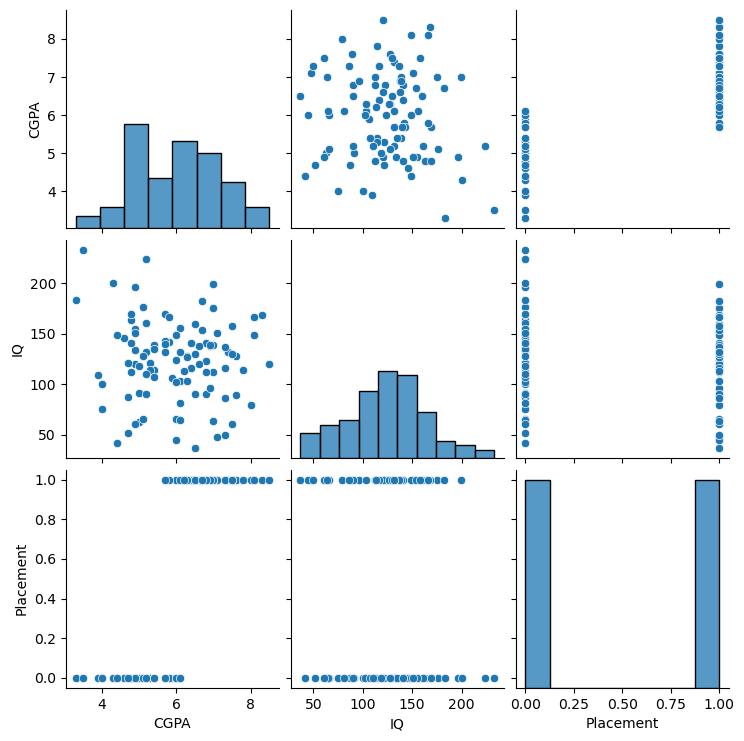

In [15]:
sns.pairplot(df)

<Axes: xlabel='CGPA', ylabel='IQ'>

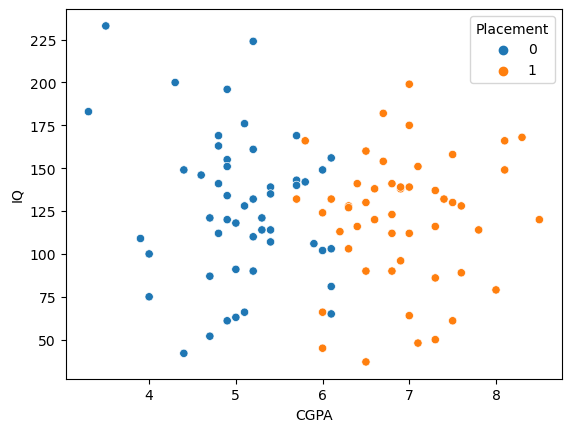

In [17]:
sns.scatterplot(x=df['CGPA'], y=df['IQ'], hue=df['Placement'])

In [18]:
df.shape

(100, 3)

In [20]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [22]:
y

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

In [25]:
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [26]:
y_pred = lr.predict(X)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
print(accuracy_score(y, y_pred))

0.93


In [30]:
dt = DecisionTreeClassifier()

In [31]:
dt.fit(X, y)
y_pred1 = dt.predict(X)

In [33]:
from sklearn.tree import plot_tree

In [35]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

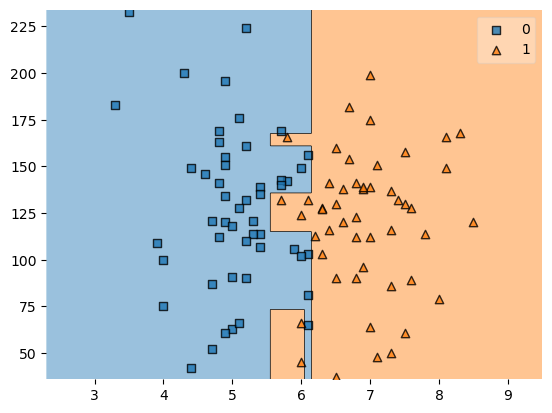

In [36]:
plot_decision_regions(X, y,dt)

[Text(0.5454545454545454, 0.9285714285714286, 'x[0] <= 6.15\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.45454545454545453, 0.7857142857142857, 'x[0] <= 5.55\ngini = 0.191\nsamples = 56\nvalue = [50, 6]'),
 Text(0.36363636363636365, 0.6428571428571429, 'gini = 0.0\nsamples = 39\nvalue = [39, 0]'),
 Text(0.5454545454545454, 0.6428571428571429, 'x[1] <= 136.0\ngini = 0.457\nsamples = 17\nvalue = [11, 6]'),
 Text(0.36363636363636365, 0.5, 'x[1] <= 115.0\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.2727272727272727, 0.35714285714285715, 'x[1] <= 73.5\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.18181818181818182, 0.21428571428571427, 'x[0] <= 6.05\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.09090909090909091, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2727272727272727, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.36363636363636365, 0.21428571428571427, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),

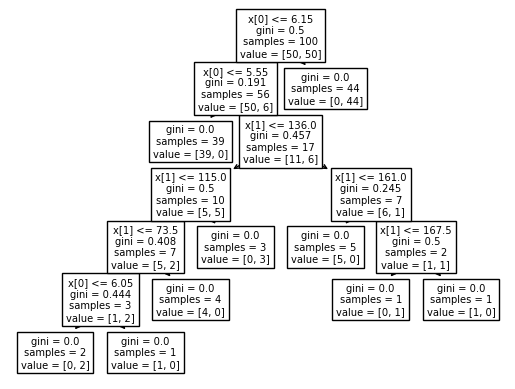

In [34]:
plot_tree(dt)

In [32]:
print(accuracy_score(y, y_pred1))

1.0


In [37]:
knn = KNeighborsClassifier()

In [38]:
knn.fit(X, y)
y_pred2 = knn.predict(X)

In [39]:
print(accuracy_score(y, y_pred2))

0.71


In [72]:
b = lr.intercept_[0]

In [76]:
w1, w2 = lr.coef_.T

In [77]:
w1

array([3.17383773])

In [78]:
w2

array([-0.00163852])

In [84]:
xmin = np.min(df['CGPA'])
xmax = np.max(df['CGPA'])

In [85]:
ymin = np.min(df['IQ'])
ymax = np.max(df['IQ'])

In [86]:
xd = np.array([xmin, xmax])

In [87]:
xd

array([3.3, 8.5])

In [89]:
c = -b/w2
m = -w1/w2

In [95]:
yd = m*xd + c

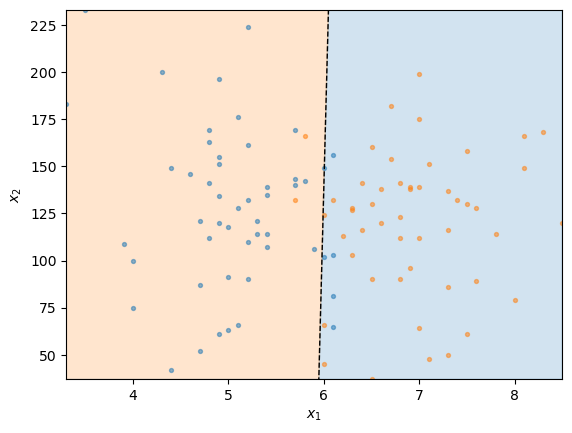

In [96]:
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(*X[y==0].T, s=8, alpha=0.5)
plt.scatter(*X[y==1].T, s=8, alpha=0.5)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')

plt.show()